In [ ]:
#kaggle dataset ile feature selection /randomforest algoritması ile
# kaggle dataset :https://www.kaggle.com/datasets/aikenkazin/ddos-sdn-dataset/data

pip install --upgrade scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 56.7 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.2
    Uninstalling scikit-learn-1.3.2:
      Successfully uninstalled scikit-learn-1.3.2


In [ ]:
# DATASET DOSYASINI GOOGLE DRİVE /tmp klasörüne unzip edilmesi
import shutil
from google.colab import drive

drive.mount("/content/gdrive")
# Change the code below if the path to the dataset is different for you.
shutil.unpack_archive("/content/gdrive/MyDrive/kaggle.zip", "/tmp/")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

In [ ]:
# Filepath kontrol edilmesi
import os

file_path = r"/tmp/dataset_sdn.csv"
if os.path.exists(file_path):
    print("Dosya bulundu.")
else:
    print("Dosya bulunamadı.")

Dosya bulundu.


In [ ]:
# CSV dosyası read edilir ayrıca kolon isimleri ve ilk satırları basılır
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# CSV dosyasını yükleme

data = pd.read_csv(r"/tmp/dataset_sdn.csv")

print("Kolon isimleri:")
print(data.columns)

# İlk birkaç satırı yazdırma (isteğe bağlı)
print("\nİlk birkaç satır:")
print(data.head())

print ( "Data shape" ,data.shape )
print ( data.info )

Kolon isimleri:
Index(['dt', 'switch', 'src', 'dst', 'pktcount', 'bytecount', 'dur',
       'dur_nsec', 'tot_dur', 'flows', 'packetins', 'pktperflow',
       'byteperflow', 'pktrate', 'Pairflow', 'Protocol', 'port_no', 'tx_bytes',
       'rx_bytes', 'tx_kbps', 'rx_kbps', 'tot_kbps', 'label'],
      dtype='object')

İlk birkaç satır:
      dt  switch       src       dst  pktcount  bytecount  dur   dur_nsec  \
0  11425       1  10.0.0.1  10.0.0.8     45304   48294064  100  716000000   
1  11605       1  10.0.0.1  10.0.0.8    126395  134737070  280  734000000   
2  11425       1  10.0.0.2  10.0.0.8     90333   96294978  200  744000000   
3  11425       1  10.0.0.2  10.0.0.8     90333   96294978  200  744000000   
4  11425       1  10.0.0.2  10.0.0.8     90333   96294978  200  744000000   

        tot_dur  flows  ...  pktrate  Pairflow  Protocol  port_no   tx_bytes  \
0  1.010000e+11      3  ...      451         0       UDP        3  143928631   
1  2.810000e+11      2  ...      451      

In [ ]:
df = pd.read_csv(r"/tmp/dataset_sdn.csv", low_memory=False)
print("Orijinal satır x sütun:", df.shape)
display(df.head())

Orijinal satır x sütun: (104345, 23)


,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,...,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
104340,5262,3,10.0.0.5,10.0.0.7,79,7742,81,842000000,8.184200e+10,5,...,0,0,ICMP,1,15209,12720,1,1.0,2.0,0
104341,5262,3,10.0.0.5,10.0.0.7,79,7742,81,842000000,8.184200e+10,5,...,0,0,ICMP,3,15099,14693,1,1.0,2.0,0
104342,5262,3,10.0.0.11,10.0.0.5,31,3038,31,805000000,3.180500e+10,5,...,1,0,ICMP,2,3409,3731,0,0.0,0.0,0
104343,5262,3,10.0.0.11,10.0.0.5,31,3038,31,805000000,3.180500e+10,5,...,1,0,ICMP,1,15209,12720,1,1.0,2.0,0
104344,5262,3,10.0.0.11,10.0.0.5,31,3038,31,805000000,3.180500e+10,5,...,1,0,ICMP,3,15099,14693,1,1.0,2.0,0


In [ ]:
# 5) Hedef (target) kolonunu tahmin etme: sık kullanılan isimlere bak
possible_targets = ['label','Label','class','Class','attack','Attack','target','Target','flow_label']
target_col = None
for t in possible_targets:
    if t in df.columns:
        target_col = t
        break

if target_col is None:
    # Eğer bulamazsa, son kolonu hedef kabul et
    target_col = df.columns[-1]
    print(f"Standart hedef isimleri bulunamadı. Varsayılan olarak son sütunu hedef kabul ediyorum: {target_col}")
else:
    print("Tahmin edilen hedef kolonu:", target_col)

Tahmin edilen hedef kolonu: label


In [ ]:
# 6) Basit veri temizleme + kategorik encoding
X = df.drop(columns=[target_col])
y = df[target_col].copy()

# Eğer hedef kategorik string ise, label encode et
if y.dtype == object:
    y = pd.factorize(y)[0]

# Kategorik sütunları one-hot yap (çok fazla kategori varsa dikkat)
obj_cols = X.select_dtypes(include=['object','category']).columns.tolist()
print("Kategorik sütunlar:", obj_cols)
if len(obj_cols) > 0:
    X = pd.get_dummies(X, columns=obj_cols, drop_first=True)

Kategorik sütunlar: ['src', 'dst', 'Protocol']


In [ ]:
# Eksik değerleri medyan ile doldur
X = X.fillna(X.median(numeric_only=True))

# Eğer hala obj kol varsa (örnek: mixed types), numeric'e zorla
non_numeric = X.select_dtypes(exclude=[np.number]).columns.tolist()
if len(non_numeric) > 0:
    print("Sayısal olmayan sütunlar tespit edildi, kaldırılıyor:", non_numeric)
    X = X.drop(columns=non_numeric)

print("Ön işleme sonrası X shape:", X.shape)

Sayısal olmayan sütunlar tespit edildi, kaldırılıyor: ['src_10.0.0.10', 'src_10.0.0.11', 'src_10.0.0.12', 'src_10.0.0.13', 'src_10.0.0.14', 'src_10.0.0.15', 'src_10.0.0.16', 'src_10.0.0.17', 'src_10.0.0.18', 'src_10.0.0.2', 'src_10.0.0.20', 'src_10.0.0.3', 'src_10.0.0.4', 'src_10.0.0.5', 'src_10.0.0.6', 'src_10.0.0.7', 'src_10.0.0.8', 'src_10.0.0.9', 'dst_10.0.0.10', 'dst_10.0.0.11', 'dst_10.0.0.12', 'dst_10.0.0.13', 'dst_10.0.0.14', 'dst_10.0.0.15', 'dst_10.0.0.16', 'dst_10.0.0.17', 'dst_10.0.0.18', 'dst_10.0.0.2', 'dst_10.0.0.3', 'dst_10.0.0.4', 'dst_10.0.0.5', 'dst_10.0.0.6', 'dst_10.0.0.7', 'dst_10.0.0.8', 'dst_10.0.0.9', 'Protocol_TCP', 'Protocol_UDP']
Ön işleme sonrası X shape: (104345, 19)


In [ ]:
# 7) (Opsiyonel) Çok büyük dataset'lerde örnekleme

MAX_ROWS = 200000  # eğer dosya çok büyükse hız için küçült
if X.shape[0] > MAX_ROWS:
    print(f"Veri çok büyük ({X.shape[0]} satır). Rastgele {MAX_ROWS} satır örnekleniyor (stratify yoksa dengeden sapabilir).")
    sample_idx = np.random.RandomState(42).choice(X.index, size=MAX_ROWS, replace=False)
    X = X.loc[sample_idx].reset_index(drop=True)
    y = pd.Series(y).loc[sample_idx].reset_index(drop=True)
    print("Örnekleme sonrası shape:", X.shape)



In [ ]:
# 8) Eğitim / test split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y if len(np.unique(y))>1 and X.shape[0]>1 else None
)
print("Train / Test:", X_train.shape, X_test.shape)


Train / Test: (83476, 19) (20869, 19)


In [ ]:
# 9) Pipeline: StandardScaler + RandomForest
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier(n_estimators=200, n_jobs=-1, random_state=42, class_weight='balanced'))
])

print("Model eğitiliyor (bu adım zaman alabilir)...")
pipe.fit(X_train, y_train)

Model eğitiliyor (bu adım zaman alabilir)...


,steps,"[('scaler', ...), ('rf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2


In [ ]:
# 10) Feature importances
rf = pipe.named_steps['rf']
importances = rf.feature_importances_
feat_names = X.columns
fi_df = pd.DataFrame({'feature': feat_names, 'importance': importances})
fi_df = fi_df.sort_values('importance', ascending=False).reset_index(drop=True)
display(fi_df.head(30))

,feature,importance
0,byteperflow,0.212361
1,pktperflow,0.149547
2,pktcount,0.144538
3,bytecount,0.140530
4,pktrate,0.126077
5,packetins,0.099581
6,tot_dur,0.033307
7,dur,0.032488
8,dt,0.030420
9,tx_bytes,0.006553


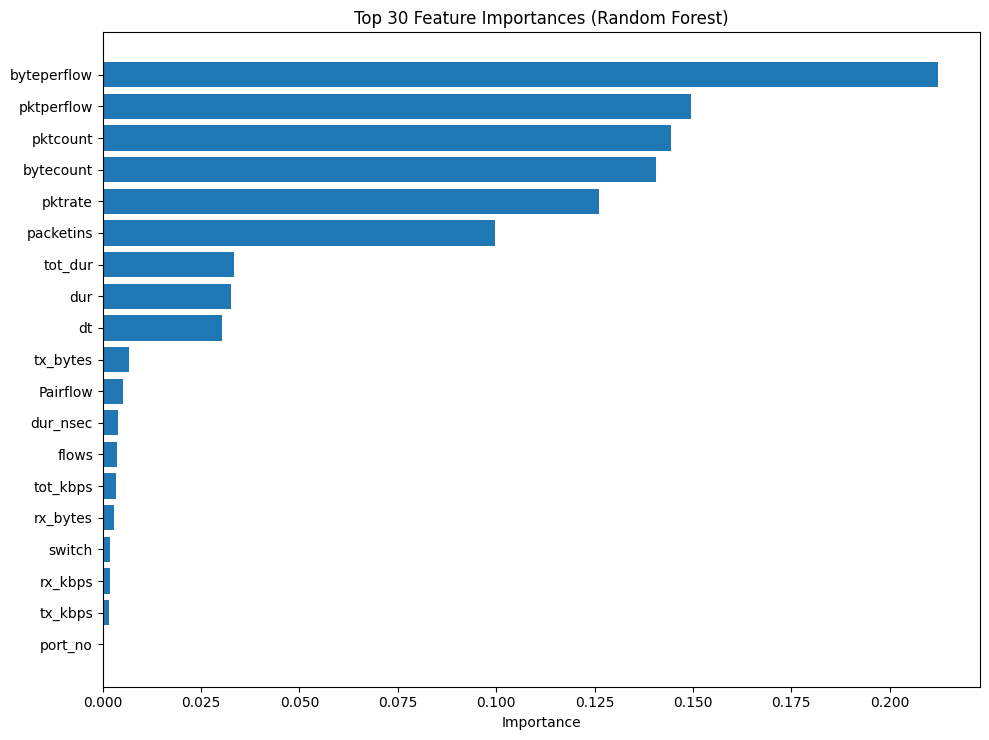

In [ ]:
# 11) Görselleştirme (top 30)
import matplotlib.pyplot as plt
top_n = 30
plt.figure(figsize=(10, max(4, 0.25*top_n)))
plt.barh(fi_df['feature'].head(top_n)[::-1], fi_df['importance'].head(top_n)[::-1])
plt.xlabel('Importance')
plt.title(f'Top {top_n} Feature Importances (Random Forest)')
plt.tight_layout()
plt.show()

In [ ]:
# 12) SelectFromModel ile otomatik seçim (threshold = median importance)
selector = SelectFromModel(rf, prefit=True, threshold='median')
X_train_sel = selector.transform(X_train)
X_test_sel = selector.transform(X_test)
selected_idx = selector.get_support(indices=True)
selected_features = feat_names[selected_idx].tolist()
print(f"Seçilen feature sayısı: {len(selected_features)}")
print(selected_features)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Seçilen feature sayısı: 10
['dt', 'pktcount', 'bytecount', 'dur', 'tot_dur', 'packetins', 'pktperflow', 'byteperflow', 'pktrate', 'tx_bytes']


In [ ]:
# 13) Seçilmiş feature'lara göre model yeniden eğit ve performans göster
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report

rf2 = RandomForestClassifier(n_estimators=200, n_jobs=-1, random_state=42, class_weight='balanced')
rf2.fit(X_train_sel, y_train)
y_pred = rf2.predict(X_test_sel)
print("Test accuracy (selected features):", accuracy_score(y_test, y_pred))
print("Classification report:")
print(classification_report(y_test, y_pred))

Test accuracy (selected features): 0.9998562461066653
Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12712
           1       1.00      1.00      1.00      8157

    accuracy                           1.00     20869
   macro avg       1.00      1.00      1.00     20869
weighted avg       1.00      1.00      1.00     20869



In [ ]:
# 5-fold CV skorları (seçilmiş feature'lar)
cv_scores = cross_val_score(rf2, selector.transform(X), y, cv=5, scoring='accuracy', n_jobs=-1)
print("5-fold CV accuracy (selected features):", cv_scores, "mean:", cv_scores.mean())

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


5-fold CV accuracy (selected features): [0.99233313 0.93511908 0.91360391 0.79486319 0.99391442] mean: 0.9259667449326752
